In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [471]:
#Find the available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [472]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [473]:
#We get the month and year column for the date, we nedd day also
#Convert the date to a yyyy-mm-dd format in a new column named yearMonth
df['yearMonth'] = '01-'+df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


In [474]:
df

,year,month,passengers,yearMonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949
...,...,...,...,...
139,1960,Aug,606,01-Aug-1960
140,1960,Sep,508,01-Sep-1960
141,1960,Oct,461,01-Oct-1960
142,1960,Nov,390,01-Nov-1960


In [475]:
#YearMonth is a type object-we may have problem later , so convert it into datetime
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None
   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01


In [476]:
#Make year month column as the dataframe index
df.set_index('yearMonth',inplace=True) # inplace will make the changes permanent to df

In [477]:
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

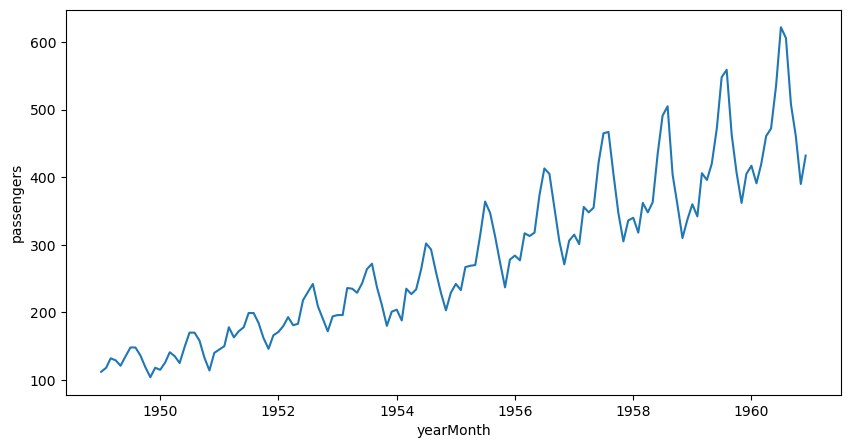

In [478]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)


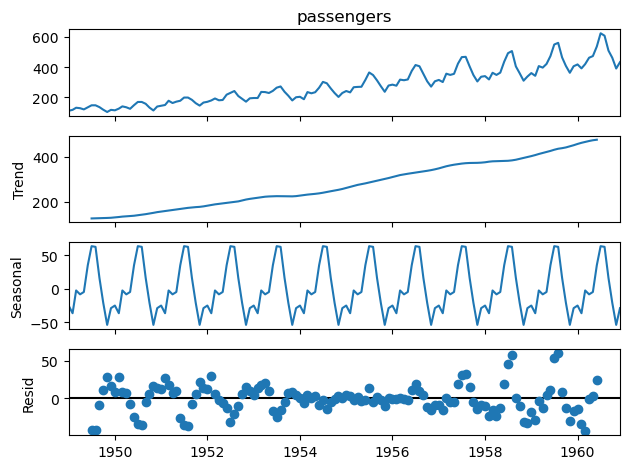

In [479]:
#Check  further for seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers,period=12)
fig = decomposition.plot()


In [480]:
# we see the graph pattern : Upward trend and clear seasonality

In [481]:
#Calculate and plot rolling mean  and standard deviation for 12 months
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

In [482]:
df['rollMean'].head(15)

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
Name: rollMean, dtype: float64

In [483]:
df['rollStd'].head(15)

yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977
Name: rollStd, dtype: float64

<Axes: xlabel='yearMonth', ylabel='passengers'>

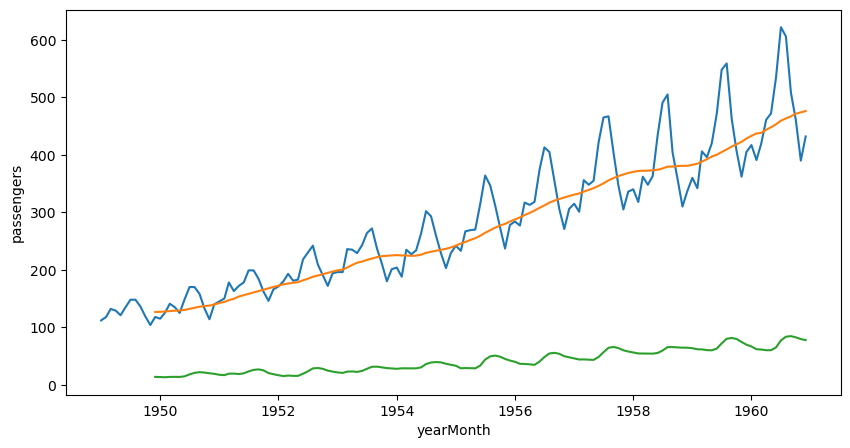

In [484]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)

In [485]:
# Conclusion : Mean is not stationary standard deviation is stationary ,so data is not stationary

# ADF Test

In [487]:
#Now let us perform the ADF test
from statsmodels.tsa.stattools import adfuller

In [488]:
adfTest = adfuller(df['passengers'])
print(adfTest)  # let us interpret these values below by converting into a series

(0.8153688792060597, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [489]:
stats = pd.Series(adfTest[0:4],index=['Test Statistics','p value','#lags used' , 'number of observation used'])
print(stats)

Test Statistics                 0.815369
p value                         0.991880
#lags used                     13.000000
number of observation used    130.000000
dtype: float64


In [490]:
#H0 time series is not stationary
#p-value >= 0.05 : Do not reject null hyothesis
#ADF statistics is less negative (or more positive) than the critical value
# Do not reject the null hypothesis , meaning the series is not stationary
for key,value in adfTest[4].items():
    print("Criticality " , key , ':' , value)

Criticality  1% : -3.4816817173418295
Criticality  5% : -2.8840418343195267
Criticality  10% : -2.578770059171598


In [491]:
#we will see that our test statistics > critical value in all cases , so we do not reject null hypothesis.
#it means our data is not stationary

# Time Shift

In [493]:
#Just get the passengers column into a new dataframe for easier testing
air_df = df[['passengers']].copy() # Double brackets because it is a list within a list

In [494]:
air_df

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [495]:
df

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN
...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500
1960-09-01,1960,Sep,508,467.083333,84.617276
1960-10-01,1960,Oct,461,471.583333,82.541954


In [496]:
#By Default, shift by 1 time period (here,one month)
# Create a new column which will contains the shift value from passengers 
#column- see slide
air_df['Shift'] = air_df.passengers.shift(2)
air_df['ShiftDiff'] = air_df['passengers'] - air_df['Shift']
air_df.head(20)

,passengers,Shift,ShiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,112.0,20.0
1949-04-01,129,118.0,11.0
1949-05-01,121,132.0,-11.0
1949-06-01,135,129.0,6.0
1949-07-01,148,121.0,27.0
1949-08-01,148,135.0,13.0
1949-09-01,136,148.0,-12.0


<Axes: xlabel='yearMonth', ylabel='passengers'>

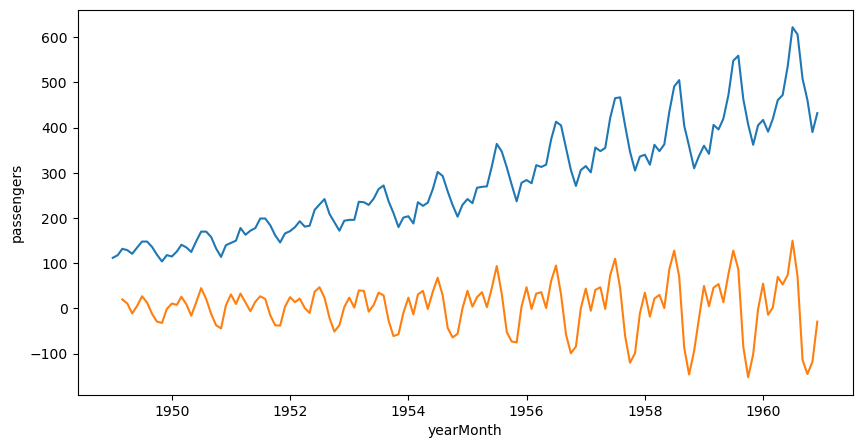

In [497]:
plt.figure(figsize=(10,5))
sns.lineplot(data=air_df,x=air_df.index,y=air_df.passengers)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.ShiftDiff)

In [498]:
air_df['rollShiftMean'] = air_df.ShiftDiff.rolling(window=12).mean()
air_df['rollShiftStd'] = air_df.ShiftDiff.rolling(window=12).std()

In [499]:
# dataFrame['rollShiftMean'] = 

# from statsmodels.tsa.stattools import adfuller
# adtTest = adfuller(dataFrame['var'])
# stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observations used'])

<Axes: xlabel='yearMonth', ylabel='passengers'>

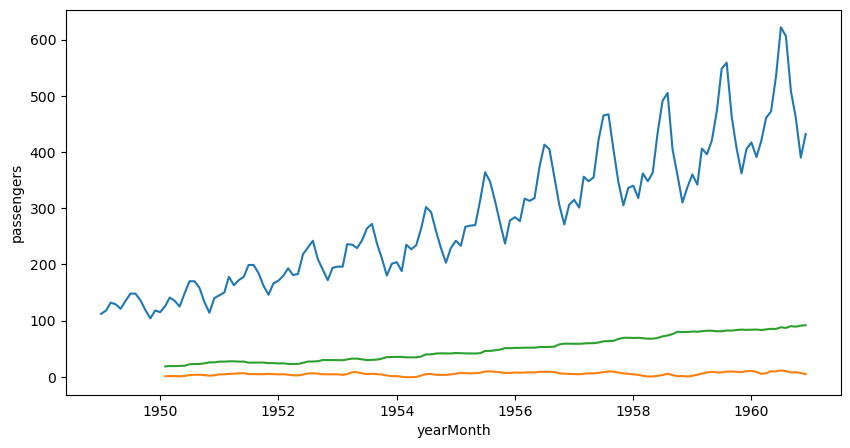

In [500]:
plt.figure(figsize=(10,5))
sns.lineplot(data=air_df,x=air_df.index,y=air_df.passengers)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.rollShiftMean)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.rollShiftStd)

In [501]:
# test Stationarity
test_stationarity = (air_df.dropna(),'shiftDiff')
#p-value is just close to 0.05 , so let us try a shift of 2

In [502]:
test_stationarity

(            passengers  Shift  ShiftDiff  rollShiftMean  rollShiftStd
 yearMonth                                                            
 1950-02-01         126  118.0        8.0       0.916667     18.490579
 1950-03-01         141  115.0       26.0       1.416667     19.123799
 1950-04-01         135  126.0        9.0       1.250000     19.041223
 1950-05-01         125  141.0      -16.0       0.833333     19.385249
 1950-06-01         149  135.0       14.0       1.500000     19.713862
 ...                ...    ...        ...            ...           ...
 1960-08-01         606  535.0       71.0      10.083333     87.003091
 1960-09-01         508  622.0     -114.0       7.666667     90.227322
 1960-10-01         461  606.0     -145.0       8.250000     89.117007
 1960-11-01         390  508.0     -118.0       6.833333     91.124124
 1960-12-01         432  461.0      -29.0       4.583333     91.693619
 
 [131 rows x 5 columns],
 'shiftDiff')

In [503]:
#By default, shift is by 1time period (here one month)
#Create a new Column which will contain the shifted value from the passengers column - see slide
air_df['shift'] = air_df.passengers.shift(2)
air_df['shiftDiff'] = air_df['passengers'] - air_df['passengers'] - air_df['shift']
air_df.head(20)

,passengers,Shift,ShiftDiff,rollShiftMean,rollShiftStd,shift,shiftDiff
yearMonth,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,112.0,20.0,NaN,NaN,112.0,-112.0
1949-04-01,129,118.0,11.0,NaN,NaN,118.0,-118.0
1949-05-01,121,132.0,-11.0,NaN,NaN,132.0,-132.0
1949-06-01,135,129.0,6.0,NaN,NaN,129.0,-129.0
1949-07-01,148,121.0,27.0,NaN,NaN,121.0,-121.0
1949-08-01,148,135.0,13.0,NaN,NaN,135.0,-135.0
1949-09-01,136,148.0,-12.0,NaN,NaN,148.0,-148.0


In [504]:
#Test Stationarity
test_stationarity = (air_df.dropna(),'shiftDiff')

# ARIMA

In [506]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [576]:
#Create columns for one month and one year lagged data
air_df['firstDiff'] = air_df['passengers'].diff()
air_df

,passengers,Shift,ShiftDiff,rollShiftMean,rollShiftStd,shift,shiftDiff,firstDiff,arimapred,Diff12,sarimaxpred
yearMonth,,,,,,,,,,,
1957-06-01,422,348.0,74.0,7.083333,61.001428,348.0,-348.0,NaN,369.670649,48.0,414.348940
1957-07-01,465,355.0,110.0,8.333333,63.084839,355.0,-355.0,43.0,365.200002,52.0,461.494315
1957-08-01,467,422.0,45.0,9.500000,63.668888,422.0,-422.0,2.0,372.643131,62.0,448.354678
1957-09-01,404,465.0,-61.0,9.250000,63.963235,465.0,-465.0,-63.0,371.754585,49.0,395.722872
1957-10-01,347,467.0,-120.0,7.500000,67.389640,467.0,-467.0,-57.0,376.692639,41.0,344.254423
1957-11-01,305,404.0,-99.0,6.250000,69.351706,404.0,-404.0,-42.0,377.555970,34.0,304.370075
1957-12-01,336,347.0,-11.0,5.333333,69.514333,347.0,-347.0,31.0,381.268881,30.0,344.912907
1958-01-01,340,305.0,35.0,4.583333,69.106582,305.0,-305.0,4.0,382.988992,25.0,354.204506
1958-02-01,318,336.0,-18.0,3.500000,69.371857,336.0,-336.0,-22.0,386.102731,17.0,338.583996


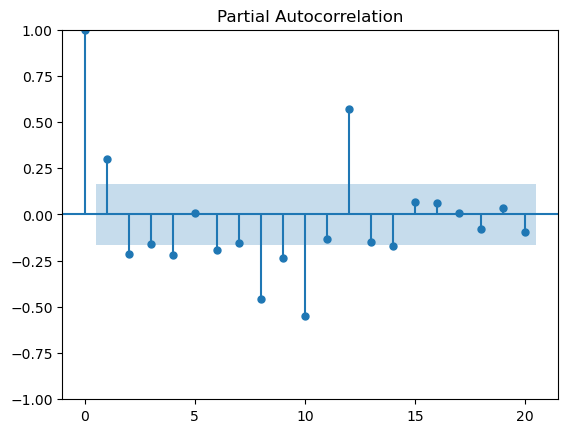

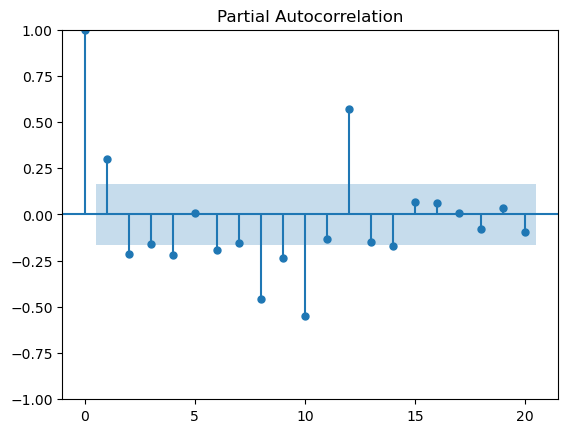

In [508]:
plot_pacf(air_df['firstDiff'].dropna(),lags=20) 

In [509]:
#Shaded area is insignificant area
#PACF givs us the auto regression values(p -refer to the slides)
#first'p' is 1 (the x axis coordinates) 

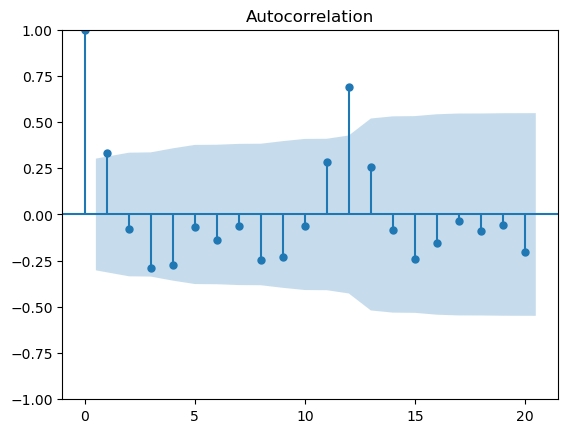

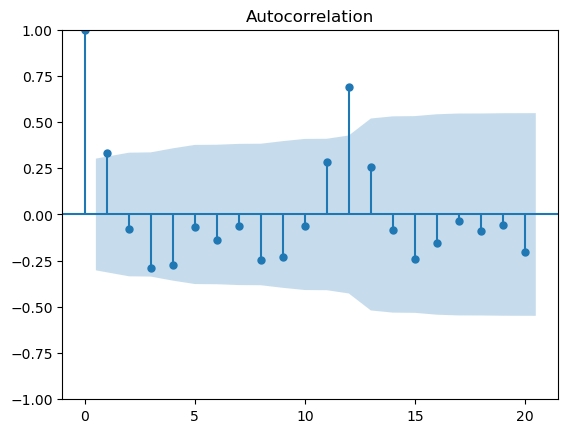

In [580]:
#Now let us take this values as p and find q for which we need acf
plot_acf(air_df['firstDiff'].dropna(),lags=20)

In [511]:
#Results of acf are similar to that of PACF
#Interpretation:  we qot q. Significant q values are 1,3,4,8 etc
#Let us take p=1,q=3,(both  are significant) and d=2 (already known)
#build the ARIMA model
train = air_df[:round(len(air_df)*70/100)] # take the first 70% data
print(train.tail())  # just to check where it ends
test = air_df[round(len(air_df)*70/100):] # take the last 30% data for test, starting from 71%
print(test.head())

            passengers  Shift  ShiftDiff  rollShiftMean  rollShiftStd  shift  \
yearMonth                                                                      
1957-01-01         315  271.0       44.0       4.916667     58.745148  271.0   
1957-02-01         301  306.0       -5.0       4.583333     58.793102  306.0   
1957-03-01         356  315.0       41.0       5.250000     59.188643  315.0   
1957-04-01         348  301.0       47.0       6.166667     59.790290  301.0   
1957-05-01         355  356.0       -1.0       6.000000     59.808786  356.0   

            shiftDiff  firstDiff  
yearMonth                         
1957-01-01     -271.0        9.0  
1957-02-01     -306.0      -14.0  
1957-03-01     -315.0       55.0  
1957-04-01     -301.0       -8.0  
1957-05-01     -356.0        7.0  
            passengers  Shift  ShiftDiff  rollShiftMean  rollShiftStd  shift  \
yearMonth                                                                      
1957-06-01         422  348.0     

In [512]:
model = ARIMA(train['passengers'],order=(1,2,3)) # parameters: p,d,q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
air_df['arimapred'] = prediction
print(air_df.tail())

            passengers  Shift  ShiftDiff  rollShiftMean  rollShiftStd  shift  \
yearMonth                                                                      
1960-08-01         606  535.0       71.0      10.083333     87.003091  535.0   
1960-09-01         508  622.0     -114.0       7.666667     90.227322  622.0   
1960-10-01         461  606.0     -145.0       8.250000     89.117007  606.0   
1960-11-01         390  508.0     -118.0       6.833333     91.124124  508.0   
1960-12-01         432  461.0      -29.0       4.583333     91.693619  461.0   

            shiftDiff  firstDiff   arimapred  
yearMonth                                     
1960-08-01     -535.0      -16.0  462.073152  
1960-09-01     -622.0      -98.0  464.613358  
1960-10-01     -606.0      -47.0  467.153578  
1960-11-01     -508.0      -71.0  469.693789  
1960-12-01     -461.0       42.0  472.234006  


C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='yearMonth', ylabel='passengers'>

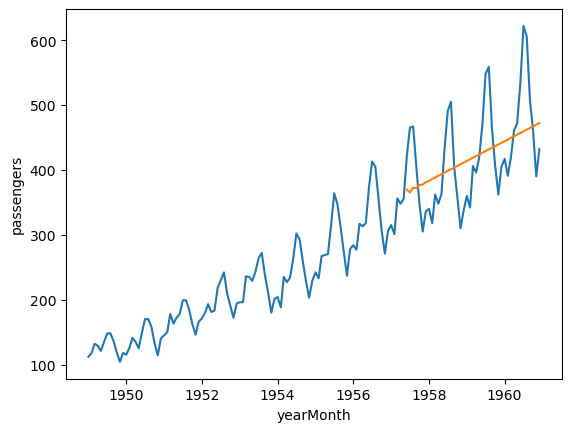

In [513]:
#plot
sns.lineplot(data=air_df , x = air_df.index,y='passengers')
sns.lineplot(data=air_df , x = air_df.index,y='arimapred')

# Conclusion : Arima prediction is  not good

# SARIMAX

In [516]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
air_df['firstDiff'] = air_df['passengers'].diff()
air_df['Diff12'] = air_df['passengers'].diff(12)

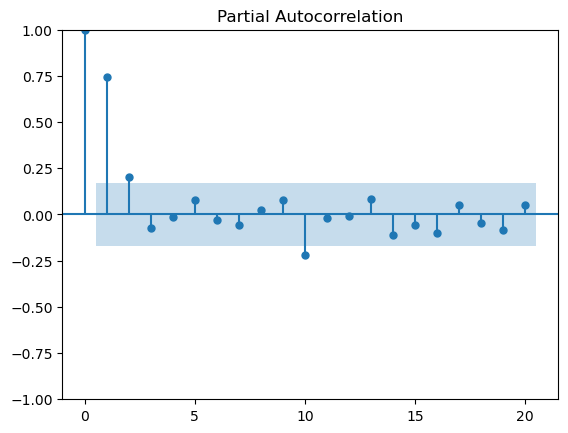

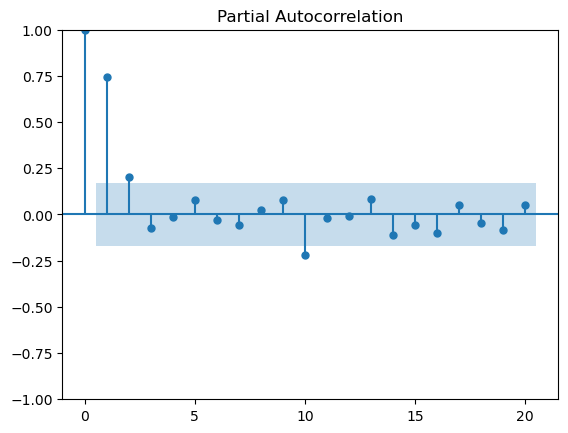

In [517]:
plot_pacf(air_df['Diff12'].dropna(),lags=20)


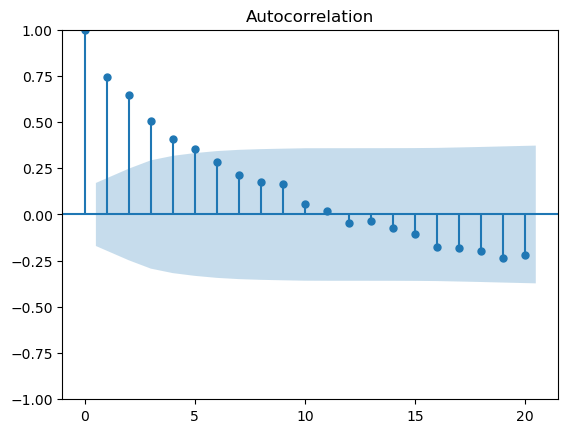

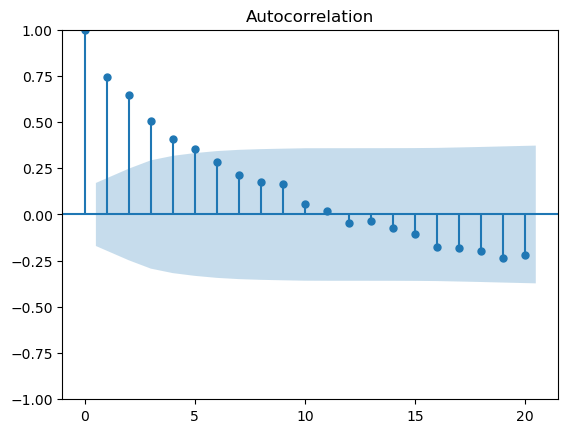

In [518]:
plot_acf(air_df['Diff12'].dropna(),lags=20)

In [519]:
train = air_df[:round(len(air_df)*70/100)] # take the first 70% data
print(train.tail())  # just to check where it ends
test = air_df[round(len(air_df)*70/100):] # take the last 30% data for test, starting from 71%
print(test.head())

            passengers  Shift  ShiftDiff  rollShiftMean  rollShiftStd  shift  \
yearMonth                                                                      
1957-01-01         315  271.0       44.0       4.916667     58.745148  271.0   
1957-02-01         301  306.0       -5.0       4.583333     58.793102  306.0   
1957-03-01         356  315.0       41.0       5.250000     59.188643  315.0   
1957-04-01         348  301.0       47.0       6.166667     59.790290  301.0   
1957-05-01         355  356.0       -1.0       6.000000     59.808786  356.0   

            shiftDiff  firstDiff  arimapred  Diff12  
yearMonth                                            
1957-01-01     -271.0        9.0        NaN    31.0  
1957-02-01     -306.0      -14.0        NaN    24.0  
1957-03-01     -315.0       55.0        NaN    39.0  
1957-04-01     -301.0       -8.0        NaN    35.0  
1957-05-01     -356.0        7.0        NaN    37.0  
            passengers  Shift  ShiftDiff  rollShiftMean  roll

In [520]:
#Now SARIMAX prediction
model = SARIMAX(train['passengers'],order=(1,2,1),seasonal_order=(1,2,1,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
air_df['sarimaxpred'] = prediction
print(air_df.tail())

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  Shift  ShiftDiff  rollShiftMean  rollShiftStd  shift  \
yearMonth                                                                      
1960-08-01         606  535.0       71.0      10.083333     87.003091  535.0   
1960-09-01         508  622.0     -114.0       7.666667     90.227322  622.0   
1960-10-01         461  606.0     -145.0       8.250000     89.117007  606.0   
1960-11-01         390  508.0     -118.0       6.833333     91.124124  508.0   
1960-12-01         432  461.0      -29.0       4.583333     91.693619  461.0   

            shiftDiff  firstDiff   arimapred  Diff12  sarimaxpred  
yearMonth                                                          
1960-08-01     -535.0      -16.0  462.073152    47.0   588.761531  
1960-09-01     -622.0      -98.0  464.613358    45.0   518.376159  
1960-10-01     -606.0      -47.0  467.153578    54.0   452.602418  
1960-11-01     -508.0      -71.0  469.693789    28.0   402.822979  
1960-12-01     -461.0       42.

            passengers  Shift  ShiftDiff  rollShiftMean  rollShiftStd  shift  \
yearMonth                                                                      
1949-01-01         112    NaN        NaN            NaN           NaN    NaN   
1949-02-01         118    NaN        NaN            NaN           NaN    NaN   
1949-03-01         132  112.0       20.0            NaN           NaN  112.0   
1949-04-01         129  118.0       11.0            NaN           NaN  118.0   
1949-05-01         121  132.0      -11.0            NaN           NaN  132.0   

            shiftDiff  firstDiff  arimapred  Diff12  sarimaxpred  
yearMonth                                                         
1949-01-01        NaN        NaN        NaN     NaN          NaN  
1949-02-01        NaN        6.0        NaN     NaN          NaN  
1949-03-01     -112.0       14.0        NaN     NaN          NaN  
1949-04-01     -118.0       -3.0        NaN     NaN          NaN  
1949-05-01     -132.0       -8.0     

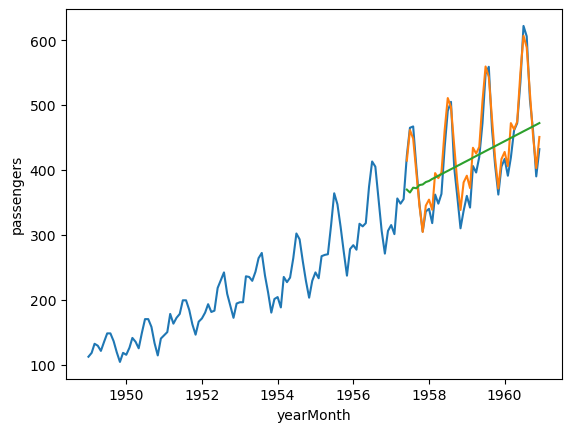

In [521]:
air_df.dropna()
print(air_df.head())
sns.lineplot(data=air_df , x = air_df.index,y='passengers')
sns.lineplot(data=air_df , x = air_df.index,y='sarimaxpred')
sns.lineplot(data=air_df , x = air_df.index,y='arimapred')

#Compare to ARIMA , SARIMAX is much better
#Future Prediction
# First check the last data in your dataset
print(air_df.tail())

In [522]:
#MS : Month start freguency
#Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end = '1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate)

Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00, 1961-06-01 00:00:00, 1961-07-01 00:00:00, 1961-08-01 00:00:00, 1961-09-01 00:00:00, 1961-10-01 00:00:00, 1961-11-01 00:00:00, 1961-12-01 00:00:00, 1962-01-01 00:00:00, 1962-02-01 00:00:00, 1962-03-01 00:00:00, 1962-04-01 00:00:00, 1962-05-01 00:00:00, 1962-06-01 00:00:00, 1962-07-01 00:00:00, 1962-08-01 00:00:00, 1962-09-01 00:00:00, 1962-10-01 00:00:00, 1962-11-01 00:00:00, 1962-12-01 00:00:00]


In [523]:
air_df

,passengers,Shift,ShiftDiff,rollShiftMean,rollShiftStd,shift,shiftDiff,firstDiff,arimapred,Diff12,sarimaxpred
yearMonth,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1949-03-01,132,112.0,20.0,NaN,NaN,112.0,-112.0,14.0,NaN,NaN,NaN
1949-04-01,129,118.0,11.0,NaN,NaN,118.0,-118.0,-3.0,NaN,NaN,NaN
1949-05-01,121,132.0,-11.0,NaN,NaN,132.0,-132.0,-8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,535.0,71.0,10.083333,87.003091,535.0,-535.0,-16.0,462.073152,47.0,588.761531
1960-09-01,508,622.0,-114.0,7.666667,90.227322,622.0,-622.0,-98.0,464.613358,45.0,518.376159
1960-10-01,461,606.0,-145.0,8.250000,89.117007,606.0,-606.0,-47.0,467.153578,54.0,452.602418


In [524]:
# predict and print
print(model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]))

1961-01-01    462.567076
1961-02-01    437.559008
1961-03-01    508.356962
1961-04-01    497.736852
1961-05-01    511.040753
1961-06-01    591.681183
1961-07-01    652.341214
1961-08-01    632.033744
1961-09-01    555.855998
1961-10-01    485.358250
1961-11-01    432.005433
1961-12-01    482.569692
1962-01-01    494.971542
1962-02-01    466.813665
1962-03-01    541.962827
1962-04-01    530.337076
1962-05-01    545.063311
1962-06-01    630.747653
1962-07-01    694.859667
1962-08-01    672.409481
1962-09-01    590.339548
1962-10-01    515.028298
1962-11-01    458.053270
1962-12-01    511.105831
Freq: MS, Name: predicted_mean, dtype: float64


In [525]:
air_df

,passengers,Shift,ShiftDiff,rollShiftMean,rollShiftStd,shift,shiftDiff,firstDiff,arimapred,Diff12,sarimaxpred
yearMonth,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1949-03-01,132,112.0,20.0,NaN,NaN,112.0,-112.0,14.0,NaN,NaN,NaN
1949-04-01,129,118.0,11.0,NaN,NaN,118.0,-118.0,-3.0,NaN,NaN,NaN
1949-05-01,121,132.0,-11.0,NaN,NaN,132.0,-132.0,-8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,535.0,71.0,10.083333,87.003091,535.0,-535.0,-16.0,462.073152,47.0,588.761531
1960-09-01,508,622.0,-114.0,7.666667,90.227322,622.0,-622.0,-98.0,464.613358,45.0,518.376159
1960-10-01,461,606.0,-145.0,8.250000,89.117007,606.0,-606.0,-47.0,467.153578,54.0,452.602418


<Axes: xlabel='yearMonth', ylabel='passengers'>

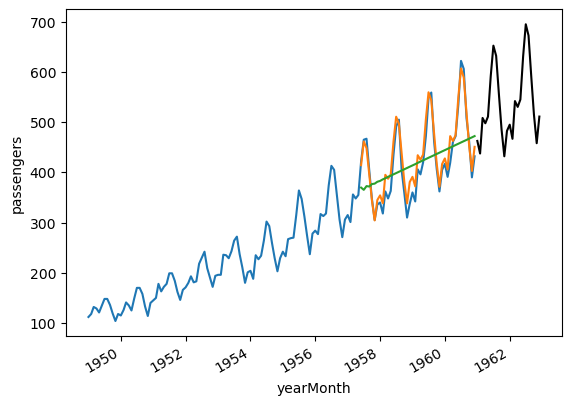

In [526]:
air_df.dropna()
sns.lineplot(data=air_df , x = air_df.index,y='passengers')
sns.lineplot(data=air_df , x = air_df.index,y='sarimaxpred')
sns.lineplot(data=air_df , x = air_df.index,y='arimapred')
model_fit.predict(start=futureDate.index[0], end = futureDate.index[-1]).plot(color='black')

In [527]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [528]:
air_df

,passengers,Shift,ShiftDiff,rollShiftMean,rollShiftStd,shift,shiftDiff,firstDiff,arimapred,Diff12,sarimaxpred
yearMonth,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1949-03-01,132,112.0,20.0,NaN,NaN,112.0,-112.0,14.0,NaN,NaN,NaN
1949-04-01,129,118.0,11.0,NaN,NaN,118.0,-118.0,-3.0,NaN,NaN,NaN
1949-05-01,121,132.0,-11.0,NaN,NaN,132.0,-132.0,-8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,535.0,71.0,10.083333,87.003091,535.0,-535.0,-16.0,462.073152,47.0,588.761531
1960-09-01,508,622.0,-114.0,7.666667,90.227322,622.0,-622.0,-98.0,464.613358,45.0,518.376159
1960-10-01,461,606.0,-145.0,8.250000,89.117007,606.0,-606.0,-47.0,467.153578,54.0,452.602418


In [568]:
air_df = air_df.dropna()
mae=  mean_absolute_error(air_df['passengers'] , air_df['sarimaxpred'])

In [566]:
rmse = mean_squared_error(air_df['passengers'] , air_df['sarimaxpred'])

In [541]:
mape = (abs((air_df['passengers'] - air_df['sarimaxpred'])/air_df['sarimaxpred']).mean()) * 100

In [543]:
mape

4.354718500925914

In [546]:
r2 = r2_score(air_df['passengers'], air_df['sarimaxpred'])

In [551]:
r2

0.9173221072962853

In [570]:
print(f'SARIMAX MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%, R^2: {r2}')

SARIMAX MAE: 18.49343038742832, RMSE: 485.8235250728674, MAPE: 4.354718500925914%, R^2: 0.9173221072962853


In [ ]:
#On average, the predictions are off by -18.49 passengers from the actual number of passengers 
#Lower values indicate better model performance 
#RMSE gives measure of error that penalizes large deviations more than MAE. In this case, the error magnitude is -22.03 passengers 
#Like MAE, lower values indicate better performance 
#The model predictions are, on average , -4.35% off from the actual passenger counts. A lower MAPE indicates better accuracy.
#and values under 10% are typically considered good for forecasting problems
#R^2 provides a proportion of variance explained by the model; a value closer to 1 indicates better fit .

